In [12]:
import time, sys, joblib

import pandas as pd

sys.path.append('/home/yilingh/SI-Interaction')
from selectinf.Simulation.plotting_helpers import *
from selectinf.Simulation.H1.nonlinear_H1_helpers import *

In [30]:
##%%
def filter_pval_dict(pval_dict, target_dict, threshold=0.05):
    target_dict_df = pd.DataFrame(target_dict)
    filtered_dict = {}
    for par in pval_dict.keys():
        filtered_dict[par] = {}
        par_dict = pval_dict[par]
        target_df_par = target_dict_df[target_dict_df['parameter'] == par]
        
        for method in par_dict.keys():
            targets_p_m = (target_df_par[target_df_par['method'] == method])['target']
            selected_targets = (np.abs(targets_p_m) < threshold)
            pvals_p_m = np.array(pval_dict[par][method])
            filtered_dict[par][method] = pvals_p_m[selected_targets].tolist()
    
    return filtered_dict

def calculate_thresholded_power(pivot, targets, level, threshold=0.05):
    pivot = np.array(pivot)
    targets = np.array(targets)
    non_null = (np.abs(targets) >= threshold)
    rejection = 2 * np.min([pivot, 1 - pivot], axis=0) < level
    true_rej = np.sum(non_null * rejection) / np.sum(non_null)

    return true_rej

# Vary Main with Weak Hierarchy

In [46]:
"""dir_list_wh = ['results0_40_wh.pkl', 'results40_80_wh.pkl',
               'results80_120_wh.pkl', 'results120_160_wh.pkl',
               'results160_200_wh.pkl', 'results200_240_wh.pkl',
               'results240_280_wh.pkl', 'results280_320_wh.pkl'
               ]"""
dir_list_wh = ['results0_8_wh1.5.pkl']

In [47]:
opers = []
pvals = []
targets = []
for path in dir_list_wh:
    result = joblib.load(path)
    list_of_oper = [tup[0] for tup in result]
    list_of_pval = [tup[1] for tup in result]
    list_of_targets = [tup[2] for tup in result]
    opers.append(combine_lists(list_of_oper))
    pvals.append(combine_nested_lists(list_of_pval))
    targets.append(combine_lists(list_of_targets))

In [48]:
oper_char = combine_lists(opers)

In [49]:
pd.DataFrame(oper_char)

,coverage rate,avg length,method,rho,signal,main signal,power
0,0.759259,1.261067,Naive,0.5,0.05,2,0.240741
1,0.976471,1.791619,Data Splitting,0.5,0.05,2,0.023529
2,0.991071,1.913551,MLE,0.5,0.05,2,0.008929
3,0.981481,1.291431,Naive,0.5,0.05,1,0.018519
4,0.989899,2.068894,Data Splitting,0.5,0.05,1,0.010101
5,0.898990,1.891261,MLE,0.5,0.05,1,0.101010
6,0.985714,1.483235,Naive,0.5,0.05,2,0.014286
7,0.969697,2.017998,Data Splitting,0.5,0.05,2,0.030303
8,0.917647,1.768210,MLE,0.5,0.05,2,0.082353
9,0.962963,1.311471,Naive,0.5,0.05,1,0.037037


In [50]:
pvals_all = combine_nested_lists(pvals)

In [51]:
targets_all = combine_lists(targets)

In [52]:
pvals_all

{2: {'Naive': [0.3175727192918154,
   0.553286495495561,
   0.1413477655853741,
   0.1604361759688952,
   0.07485873307212539,
   0.0596500371725152,
   0.26128401516370553,
   0.0813260511103242,
   0.07278152767528578,
   0.2062134526069732,
   0.06934176361471478,
   0.02353950587189493,
   0.1602637442325815,
   0.18898456875801217,
   0.08924360324464886,
   0.5733045481165798,
   0.25325655601472297,
   0.1436843516351945,
   0.04715125492482564,
   0.048487073952986175,
   0.2047945384706351,
   0.10742676027081888,
   0.01487997121848271,
   0.04911481408029574,
   0.1511584975309131,
   0.05225916460678442,
   0.025512605343040087,
   0.18619526145033993,
   0.07665952616942694,
   0.11033180198045484,
   0.3117378032608983,
   0.20916107098011383,
   0.023585957499654916,
   0.4644848566363442,
   0.14041138234786876,
   0.07784628534815129,
   0.040914342678218134,
   0.12707591925918182,
   0.1305827709257682,
   0.040204102509496235,
   0.032113911084753595,
   0.089254603

In [53]:
pd.DataFrame(targets_all)

,parameter,target,target id,method,index,pivot
0,2,1.610868,"(0, 1)",Naive,0,0.317573
1,2,0.548684,"(0, 2)",Naive,0,0.553286
2,2,1.473082,"(0, 3)",Naive,0,0.141348
3,2,1.827297,"(0, 4)",Naive,0,0.160436
4,2,1.932372,"(0, 5)",Naive,0,0.074859
...,...,...,...,...,...,...
3756,1,0.585818,"(5, 15)",MLE,7,0.750717
3757,1,0.664044,"(5, 16)",MLE,7,0.615286
3758,1,0.592588,"(5, 17)",MLE,7,0.958193
3759,1,0.664388,"(5, 18)",MLE,7,0.897208


# Calculating Thresholded Power

In [54]:
grouped_targets = pd.DataFrame(targets_all).groupby(['index', 'method', 'parameter'])

In [55]:
power_df = {}
power_df['parameter'] = []
power_df['method'] = []
power_df['thresholded power'] = []
for name, group in grouped_targets:
    power_df['parameter'].append(name[2])
    power_df['method'].append(name[1])
    pivots = group['pivot']
    targets = group['target']
    power_df['thresholded power'].append(calculate_thresholded_power(pivots, targets,
                                                                     level=0.1, 
                                                                     threshold=0.05))
    

In [56]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all, targets_all, threshold = 0.1)

ValueError: max() arg is an empty sequence

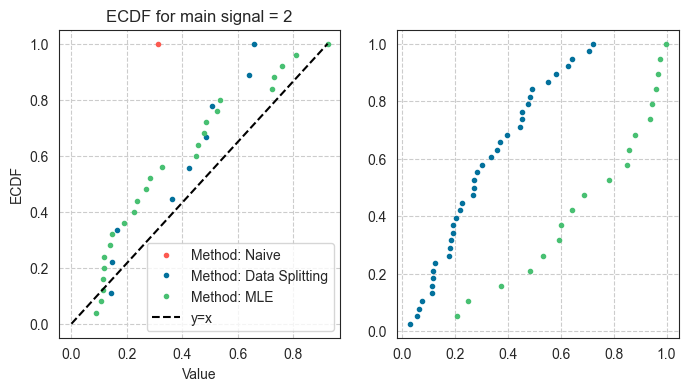

In [57]:
plot_ecdfs(filtered_dict, xaxis="main signal")

In [58]:
## Plotting dict: SNR - Method - List of pvals
filtered_dict = filter_pval_dict(pvals_all, targets_all, threshold = 10)

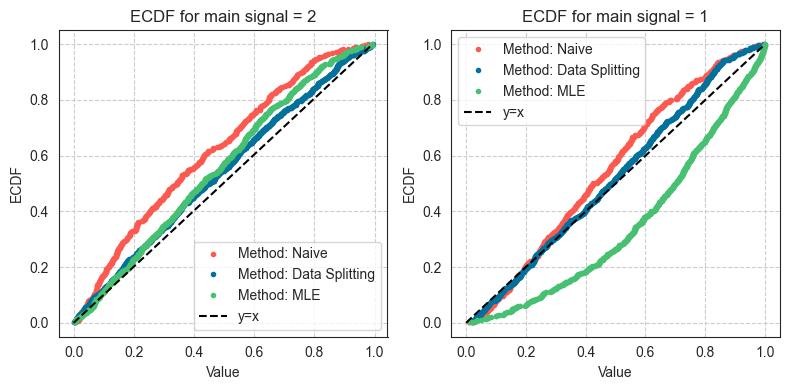

In [59]:
plot_ecdfs(filtered_dict, xaxis="main signal")

In [38]:
pd.DataFrame(targets_all)

,parameter,target,target id,method
0,10,1.548096,"(0, 1)",Naive
1,10,0.828848,"(0, 2)",Naive
2,10,1.479679,"(0, 3)",Naive
3,10,1.888243,"(0, 4)",Naive
4,10,1.958373,"(0, 5)",Naive
...,...,...,...,...
335674,1,-0.449803,"(14, 19)",MLE
335675,1,0.181771,"(15, 19)",MLE
335676,1,0.209295,"(16, 19)",MLE
335677,1,0.265221,"(17, 19)",MLE


In [39]:
# List and array representations of true interaction indices
active_inter_list_true = np.array([[0, 1], [1, 2], [2, 4], [1, 5], [2, 6]])
active_inter_list_true_list = [(x[0], x[1]) for x in active_inter_list_true]

In [40]:
import ast
def filter_targets(targets_dict, true_inter_list):
    targets = targets_dict['target id']
    true_flag = [ast.literal_eval(t) in true_inter_list for t in targets]
    filtered_dict = {}
    for k in targets_dict.keys():
        filtered_dict[k] = np.array(targets_dict[k])[true_flag].tolist()
        
    return filtered_dict
        

In [41]:
filtered_targets = filter_targets(targets_all, active_inter_list_true_list)

In [42]:
##%%
def filter_targets_dict(target_dict, method='Naive'):
    filtered_dict = {}
    for par in target_dict.keys():
        filtered_dict[par] = (np.array(target_dict[par])[np.array(target_dict['method']) == method]).tolist()
    
    return filtered_dict

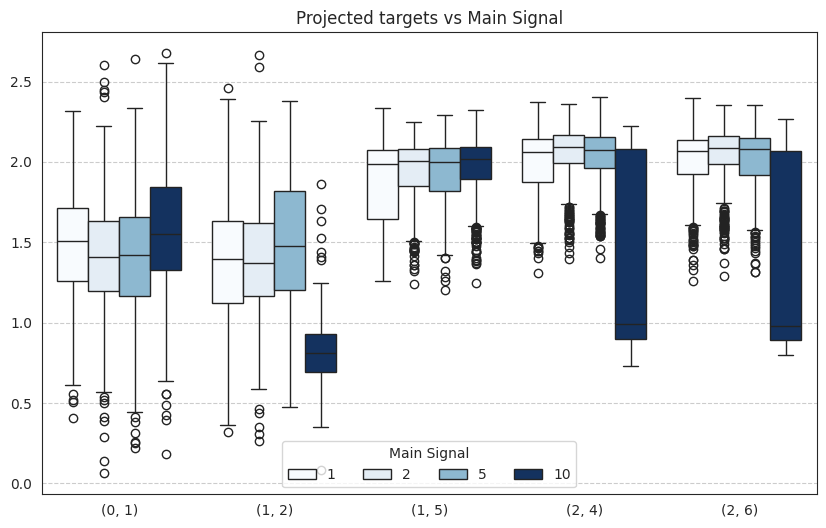

In [43]:
plot_multi_targets(filter_targets_dict(filtered_targets,'Naive'), xaxis="Main Signal")

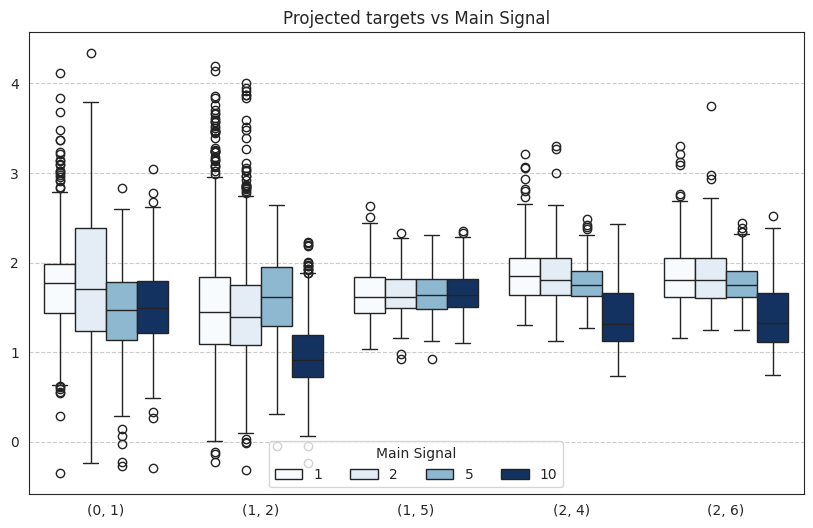

In [44]:
plot_multi_targets(filter_targets_dict(filtered_targets,'Data Splitting'), xaxis="Main Signal")

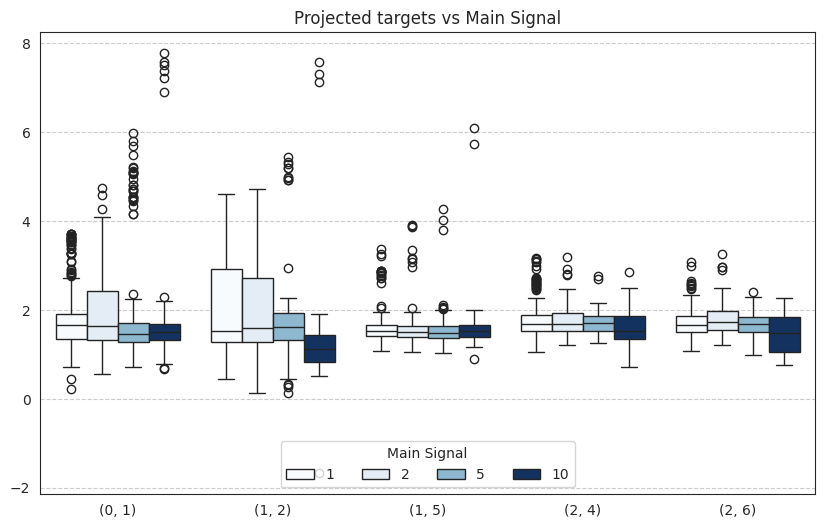

In [45]:
plot_multi_targets(filter_targets_dict(filtered_targets,'MLE'), xaxis="Main Signal")

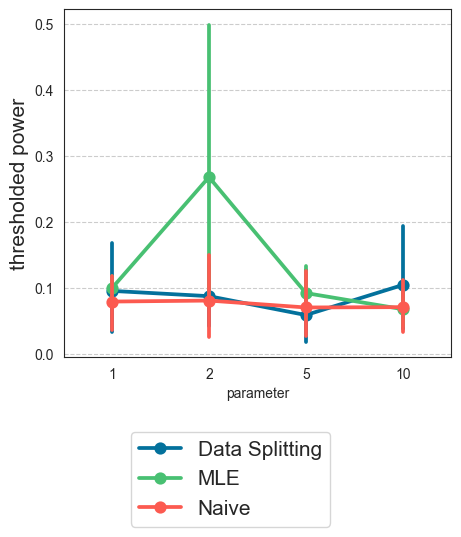

In [45]:
point_plot_multimetrics(oper_char_df=pd.DataFrame(power_df),
                        x_axis="parameter",
                        hue="method",
                        metric_list=["thresholded power"])

In [47]:
targets_df = pd.DataFrame(targets_all)

In [48]:
targets_df

,parameter,target,target id,method
0,10,1.548096,"(0, 1)",Naive
1,10,0.828848,"(0, 2)",Naive
2,10,1.479679,"(0, 3)",Naive
3,10,1.888243,"(0, 4)",Naive
4,10,1.958373,"(0, 5)",Naive
...,...,...,...,...
335674,1,-0.449803,"(14, 19)",MLE
335675,1,0.181771,"(15, 19)",MLE
335676,1,0.209295,"(16, 19)",MLE
335677,1,0.265221,"(17, 19)",MLE


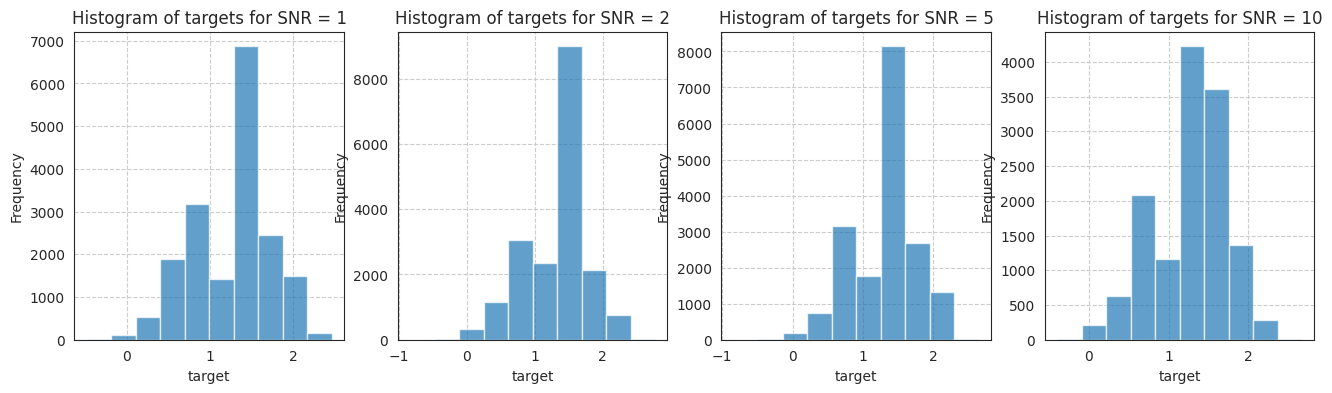

In [49]:
targets_df_naive = targets_df[targets_df['method']=='Naive']
# Grouping by 'y' and plotting histograms
grouped_targets = targets_df_naive.groupby('parameter')
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
i = 0
for name, group in grouped_targets:
    axs[i].hist(group['target'], bins=10, alpha=0.7)
    axs[i].set_xlabel('target')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram of targets for SNR = {name}')
    i += 1